In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft
from scipy import stats


#import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn.decomposition import PCA


from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics

def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot(np.array([0,nx,nx,0,0])-0.5,np.array([0,0,ny,ny,0])-0.5,'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot(np.array([i,i+1])-0.5,np.array([j+1,j+1])-0.5,'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot(np.array([i+1,i+1])-0.5,np.array([j,j+1])-0.5,'k')
    return None

nx,ny=64,146
ratio=ny/nx

x1, x2, y1, y2 = 69,74,30,35


sil,labels=np.load('opti_sil.npy'),np.load('opti_labels.npy')


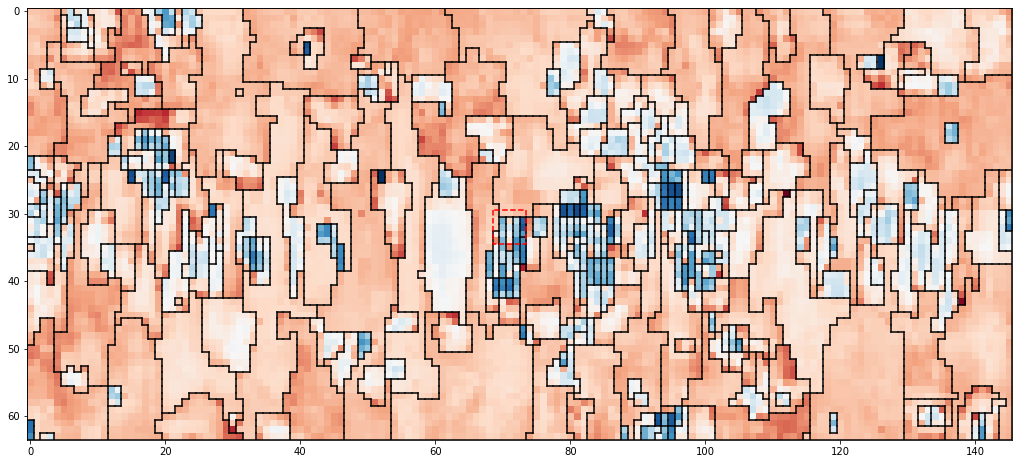

In [2]:
fig = plt.figure(constrained_layout=False,figsize=(12,12))

gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=0.5*ratio,bottom=0,top=0.5, wspace=0.07,hspace=0.14)#,sharex=True)

ax = fig.add_subplot(gs[0,0])

ax.imshow(sil.reshape((nx,ny)),cmap='RdBu')

#x1, x2, y1, y2 = 56,61,37,42

#draw(ax,np.flip(np.flip(labels.reshape((nx,ny)).T,0),1))
draw(ax,labels.reshape((nx,ny)).T)

ax.plot(np.array([x1,x1,x2,x2,x1])-0.5,np.array([y1,y2,y2,y1,y1])-0.5,'r--')

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
---

<Figure size 432x288 with 0 Axes>

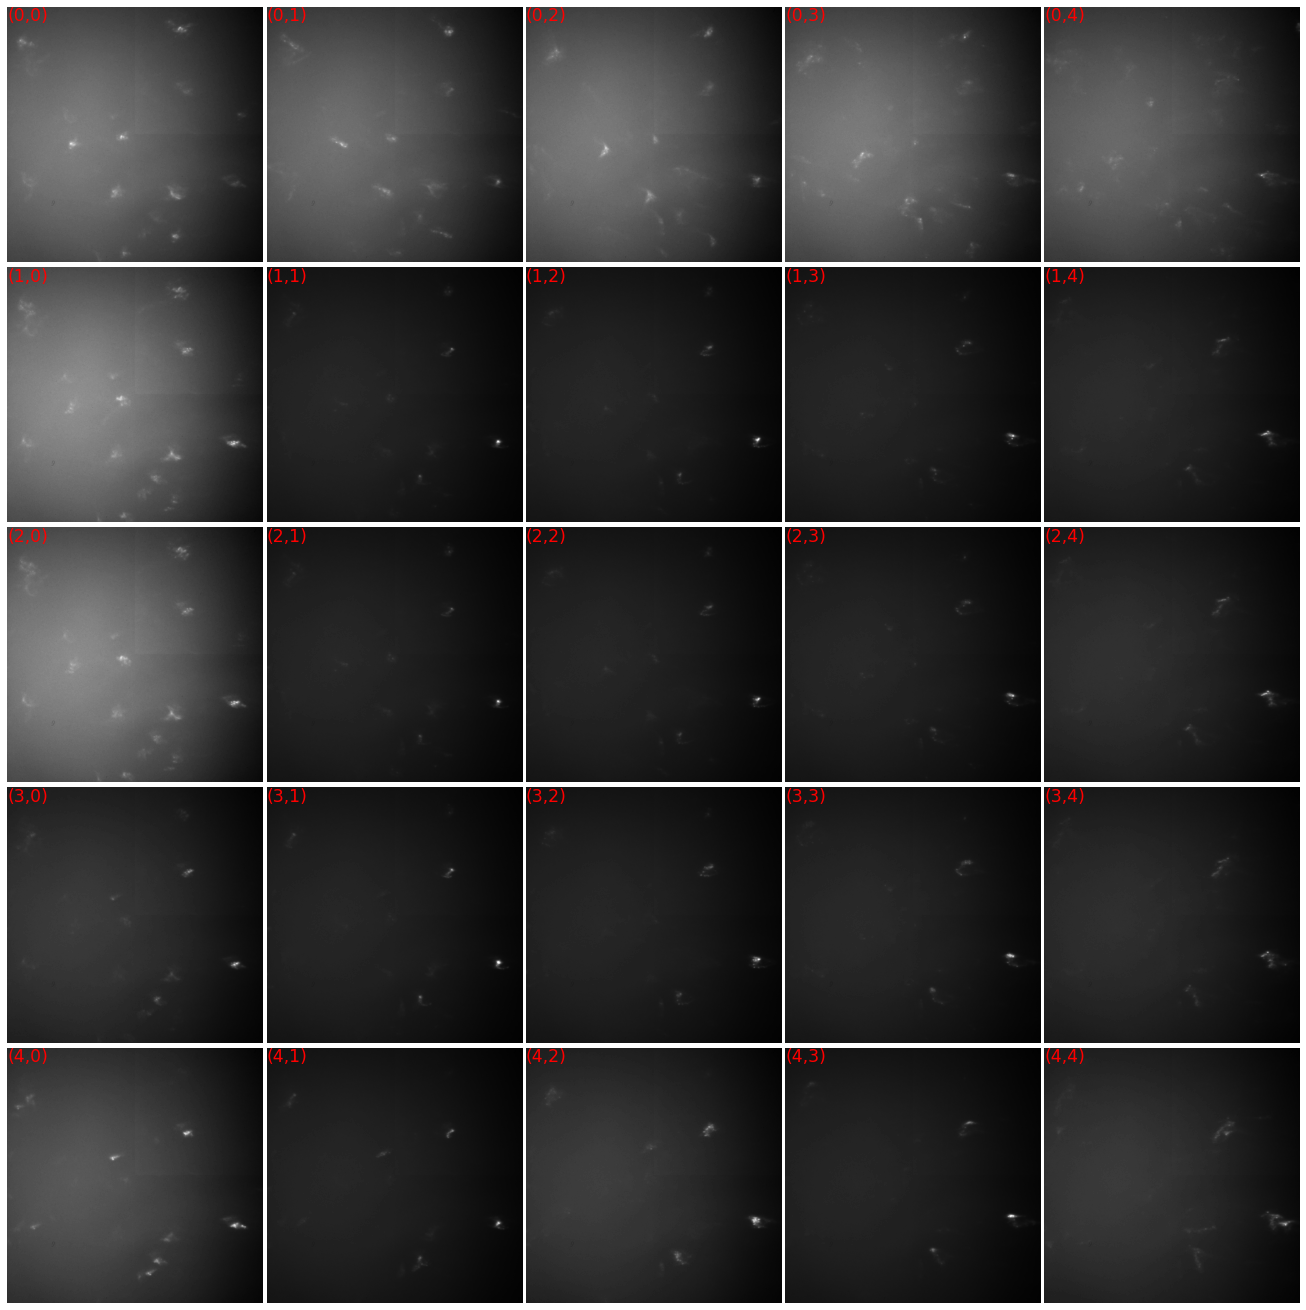

In [6]:
import matplotlib.pyplot as plt

plt.clf()
import lauetools.LaueTools.IOimagefile as IOimage
fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=5, ncols=5, left=0, right=1.5,bottom=0,top=1.5, wspace=0.002,hspace=0.02)

#x1, x2, y1, y2 = 0,5,0,5

#s_range=range(64)
#c_range=range(146)

s_range=range(y1,y2)
c_range=range(x1,x2)

#ims=np.zeros((1024*5,1024*5))

for i in s_range:
    for j in c_range:
        if (i >= 100):
            str_i=str(i)
        else:
            if (i >= 10):
                str_i='0'+str(i)
            else:
                str_i='00'+str(i)
        if (j >= 100):
            str_j=str(j)
        else:
            if (j >= 10):
                str_j='0'+str(j)
            else:
                str_j='00'+str(j)
        path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
        im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
        im=(im-im.mean())/im.std()
        #ims[1024*(i-min(s_range)):1024*((i-min(s_range))+1),1024*(j-min(c_range)):1024*((j-min(c_range))+1)]=(im-im.mean())/im.std()
        ax = fig.add_subplot(gs[(i-min(s_range)),(j-min(c_range))])#(gs[(i-min(s_range)),4-(j-min(c_range))])
        #ax.text(0,0,"S"+str_i+"_C"+str_j,size='xx-large',verticalalignment='top',color='red')
        ax.text(0,0,"(%i,%i)"%((i-min(s_range)),(j-min(c_range))),size='xx-large',verticalalignment='top',color='red')
        ax.axis('off')
        im=ax.imshow(im,cmap='gray')
#plt.imshow(ims,cmap='gray')

plt.savefig('v2_fig11.tif',format='tif',bbox_inches ='tight')

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...


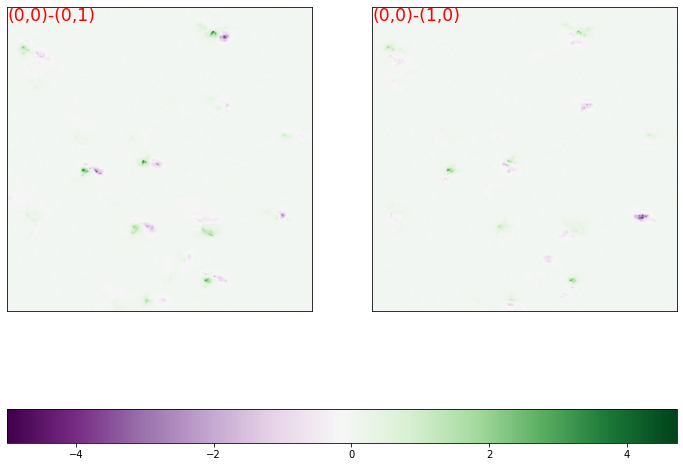

In [4]:
from matplotlib import colors

fig, axs = plt.subplots(ncols=2, figsize=(12,12))


images = []

s_range=range(y1,y2)
c_range=range(x1,x2)

#ims=np.zeros((1024*5,1024*5))

i = s_range[0]
j = c_range[0]
if (i >= 100):
    str_i=str(i)
else:
    if (i >= 10):
        str_i='0'+str(i)
    else:
        str_i='00'+str(i)
if (j >= 100):
    str_j=str(j)
else:
    if (j >= 10):
        str_j='0'+str(j)
    else:
        str_j='00'+str(j)
path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
im0=(im-im.mean())/im.std()

i = s_range[0]
j = c_range[1]
if (i >= 100):
    str_i=str(i)
else:
    if (i >= 10):
        str_i='0'+str(i)
    else:
        str_i='00'+str(i)
if (j >= 100):
    str_j=str(j)
else:
    if (j >= 10):
        str_j='0'+str(j)
    else:
        str_j='00'+str(j)
path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
im1=(im-im.mean())/im.std()

i = s_range[1]
j = c_range[0]
if (i >= 100):
    str_i=str(i)
else:
    if (i >= 10):
        str_i='0'+str(i)
    else:
        str_i='00'+str(i)
if (j >= 100):
    str_j=str(j)
else:
    if (j >= 10):
        str_j='0'+str(j)
    else:
        str_j='00'+str(j)
path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
im2=(im-im.mean())/im.std()



#for i in range(Nr):
#    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#        data = ((1 + i + j) / 10) * np.random.rand(10, 20) * 1e-6
images.append(axs[0].imshow(im0-im1, cmap='PRGn'))
axs[0].text(0,0,"(0,0)-(0,1)",size='xx-large',verticalalignment='top',color='red')
#axs[0].axis('off')
#        axs[i, j].label_outer()
images.append(axs[1].imshow(im0-im2, cmap='PRGn'))
axs[1].text(0,0,"(0,0)-(1,0)",size='xx-large',verticalalignment='top',color='red')
#axs[1].axis('off')

axs[0].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

axs[1].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)



vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)


# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
    
plt.savefig('v2_fig12a.tif',format='tif',bbox_inches ='tight')

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...


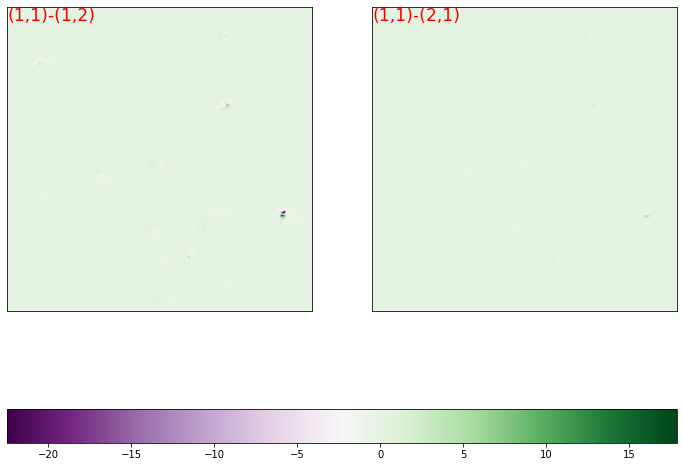

In [19]:
from matplotlib import colors

fig, axs = plt.subplots(ncols=2, figsize=(12,12))


images = []

s_range=range(y1,y2)
c_range=range(x1,x2)

#ims=np.zeros((1024*5,1024*5))

i = s_range[1]
j = c_range[1]
if (i >= 100):
    str_i=str(i)
else:
    if (i >= 10):
        str_i='0'+str(i)
    else:
        str_i='00'+str(i)
if (j >= 100):
    str_j=str(j)
else:
    if (j >= 10):
        str_j='0'+str(j)
    else:
        str_j='00'+str(j)
path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
im0=(im-im.mean())/im.std()

i = s_range[1]
j = c_range[2]
if (i >= 100):
    str_i=str(i)
else:
    if (i >= 10):
        str_i='0'+str(i)
    else:
        str_i='00'+str(i)
if (j >= 100):
    str_j=str(j)
else:
    if (j >= 10):
        str_j='0'+str(j)
    else:
        str_j='00'+str(j)
path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
im1=(im-im.mean())/im.std()

i = s_range[2]
j = c_range[1]
if (i >= 100):
    str_i=str(i)
else:
    if (i >= 10):
        str_i='0'+str(i)
    else:
        str_i='00'+str(i)
if (j >= 100):
    str_j=str(j)
else:
    if (j >= 10):
        str_j='0'+str(j)
    else:
        str_j='00'+str(j)
path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
im2=(im-im.mean())/im.std()



#for i in range(Nr):
#    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#        data = ((1 + i + j) / 10) * np.random.rand(10, 20) * 1e-6
images.append(axs[0].imshow(im0-im1, cmap='PRGn'))
axs[0].text(0,0,"(1,1)-(1,2)",size='xx-large',verticalalignment='top',color='red')
#axs[0].axis('off')
#        axs[i, j].label_outer()
images.append(axs[1].imshow(im0-im2, cmap='PRGn'))
axs[1].text(0,0,"(1,1)-(2,1)",size='xx-large',verticalalignment='top',color='red')
#axs[1].axis('off')

axs[0].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

axs[1].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)


vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)


# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)

plt.savefig('v2_fig12b.tif',format='tif',bbox_inches ='tight')